# Question 1

## Part A

In [103]:
# Importing libraries
import pandas as pd
import numpy as np

# Read csv file into a pandas dataframe with missing values consideration
missing_values = ["-", "?", "--"]
df = pd.read_csv("GBA_data.csv", na_values = missing_values)

#Print variable column headers
df.columns


Index(['origin', 'destination', 'start', 'end', 'id', 'type', 'subscriber',
       'yob', 'age', 'gender'],
      dtype='object')

## Part B

In [104]:
#Identifying the variable columns which have missing values
df.columns[df.isna().any()].tolist()

['origin', 'destination', 'type', 'yob', 'age', 'gender']

In [105]:
#Checking how many missing values are in each variable column
df.isnull().sum()

origin         504
destination    504
start            0
end              0
id               0
type            10
subscriber       0
yob             10
age             10
gender           3
dtype: int64

In [106]:
#We delete the row when the missing value is in 'origin' or 'destination' variable columns.
#Because our origin and destination give us the most useful information and replacing it with our best guess is still not accurate enough. Hence it is better to drop it.
df = df.dropna(subset=['origin','destination'])
df.isnull().sum()

origin          0
destination     0
start           0
end             0
id              0
type           10
subscriber      0
yob            10
age            10
gender          3
dtype: int64

In [107]:
#We replace 'gender' & 'type' variable columns using the mode of these columns since they represent categorical features and are the most frequently occurring value.
df['type'] = df['type'].fillna(df['type'].mode()[0])
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
df.isnull().sum()

origin          0
destination     0
start           0
end             0
id              0
type            0
subscriber      0
yob            10
age            10
gender          0
dtype: int64

In [108]:
#We replace 'age' & 'yob' variable columns using the median of these columns since they represent the middle value and are interval or numeric values.
#We don't use mean value for replacement because we haven't treated outliers so median remains the best choice.
df['age'] = df['age'].fillna(df['age'].median())
df['yob'] = df['yob'].fillna(df['yob'].median())
df.isnull().sum()

origin         0
destination    0
start          0
end            0
id             0
type           0
subscriber     0
yob            0
age            0
gender         0
dtype: int64

## Part C

### Data Quality Issue 1: Lack of attribute uniqueness (Redundancy)

In [109]:
#Fix by Dropping the 'yob' column
df.drop('yob', axis=1, inplace=True)
df.columns

Index(['origin', 'destination', 'start', 'end', 'id', 'type', 'subscriber',
       'age', 'gender'],
      dtype='object')

### Data Quality Issue 2: Lack of Data Completeness:
#### 'origin' & 'destination' variable columns should never have a missing value. This must be a required field.

### Data Quality Issue 3: Data Type issues:

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669505 entries, 0 to 670007
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   origin       669505 non-null  float64
 1   destination  669505 non-null  float64
 2   start        669505 non-null  object 
 3   end          669505 non-null  object 
 4   id           669505 non-null  int64  
 5   type         669505 non-null  object 
 6   subscriber   669505 non-null  object 
 7   age          669505 non-null  float64
 8   gender       669505 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 51.1+ MB


#### As we can see here that 'age' variable column is a float64 data type (decimal). This means that instead of having the full rounded number 55 as age, we will have 55.0. We don't really need this decimal number. Without this decimal point, the data analysis and plotting will be more understandable and easier to visualize.
#### We can use the same logic with 'origin' & 'destination' variable columns as well since they represent places. Decimals are not needed!

In [111]:
#Changing these columns' types from float64 to int64
df['age'] = df['age'].astype('int64')
df['origin'] = df['origin'].astype('int64')
df['destination'] = df['destination'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669505 entries, 0 to 670007
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   origin       669505 non-null  int64 
 1   destination  669505 non-null  int64 
 2   start        669505 non-null  object
 3   end          669505 non-null  object
 4   id           669505 non-null  int64 
 5   type         669505 non-null  object
 6   subscriber   669505 non-null  object
 7   age          669505 non-null  int64 
 8   gender       669505 non-null  object
dtypes: int64(4), object(5)
memory usage: 51.1+ MB


#### Now the data looks more consistent with it's data type and will make our readability better!

# Part E

## First Visualisation:

In [112]:
#Get the specific dataframes to obtain subscriber ratio: total vs subscribed for each gender.
total_count = df['gender'].value_counts()   #Count number of each gender in total population
sub_df = df.loc[df['subscriber'] == 'Yes']  #Keep Only the population which has subscribed
gender = sub_df['gender'].value_counts()    #Count number of each gender in subscribed population
ratio = gender.div(total_count)

sub_df.head()

,origin,destination,start,end,id,type,subscriber,age,gender
4,17,8,2022-01-01 00:15:33.369,2022-01-01 00:58:56.522,1788,Regular,Yes,26,Male
5,17,8,2022-01-01 00:17:54.588,2022-01-01 00:59:13.448,1586,Regular,Yes,27,Female
6,17,8,2022-01-01 00:19:49.117,2022-01-01 00:59:28.203,346,Regular,Yes,26,Female
10,15,13,2022-01-01 00:39:18.607,2022-01-01 00:58:59.836,1691,Regular,Yes,27,Male
11,15,13,2022-01-01 00:39:45.670,2022-01-01 00:59:10.953,1568,Regular,Yes,27,Female


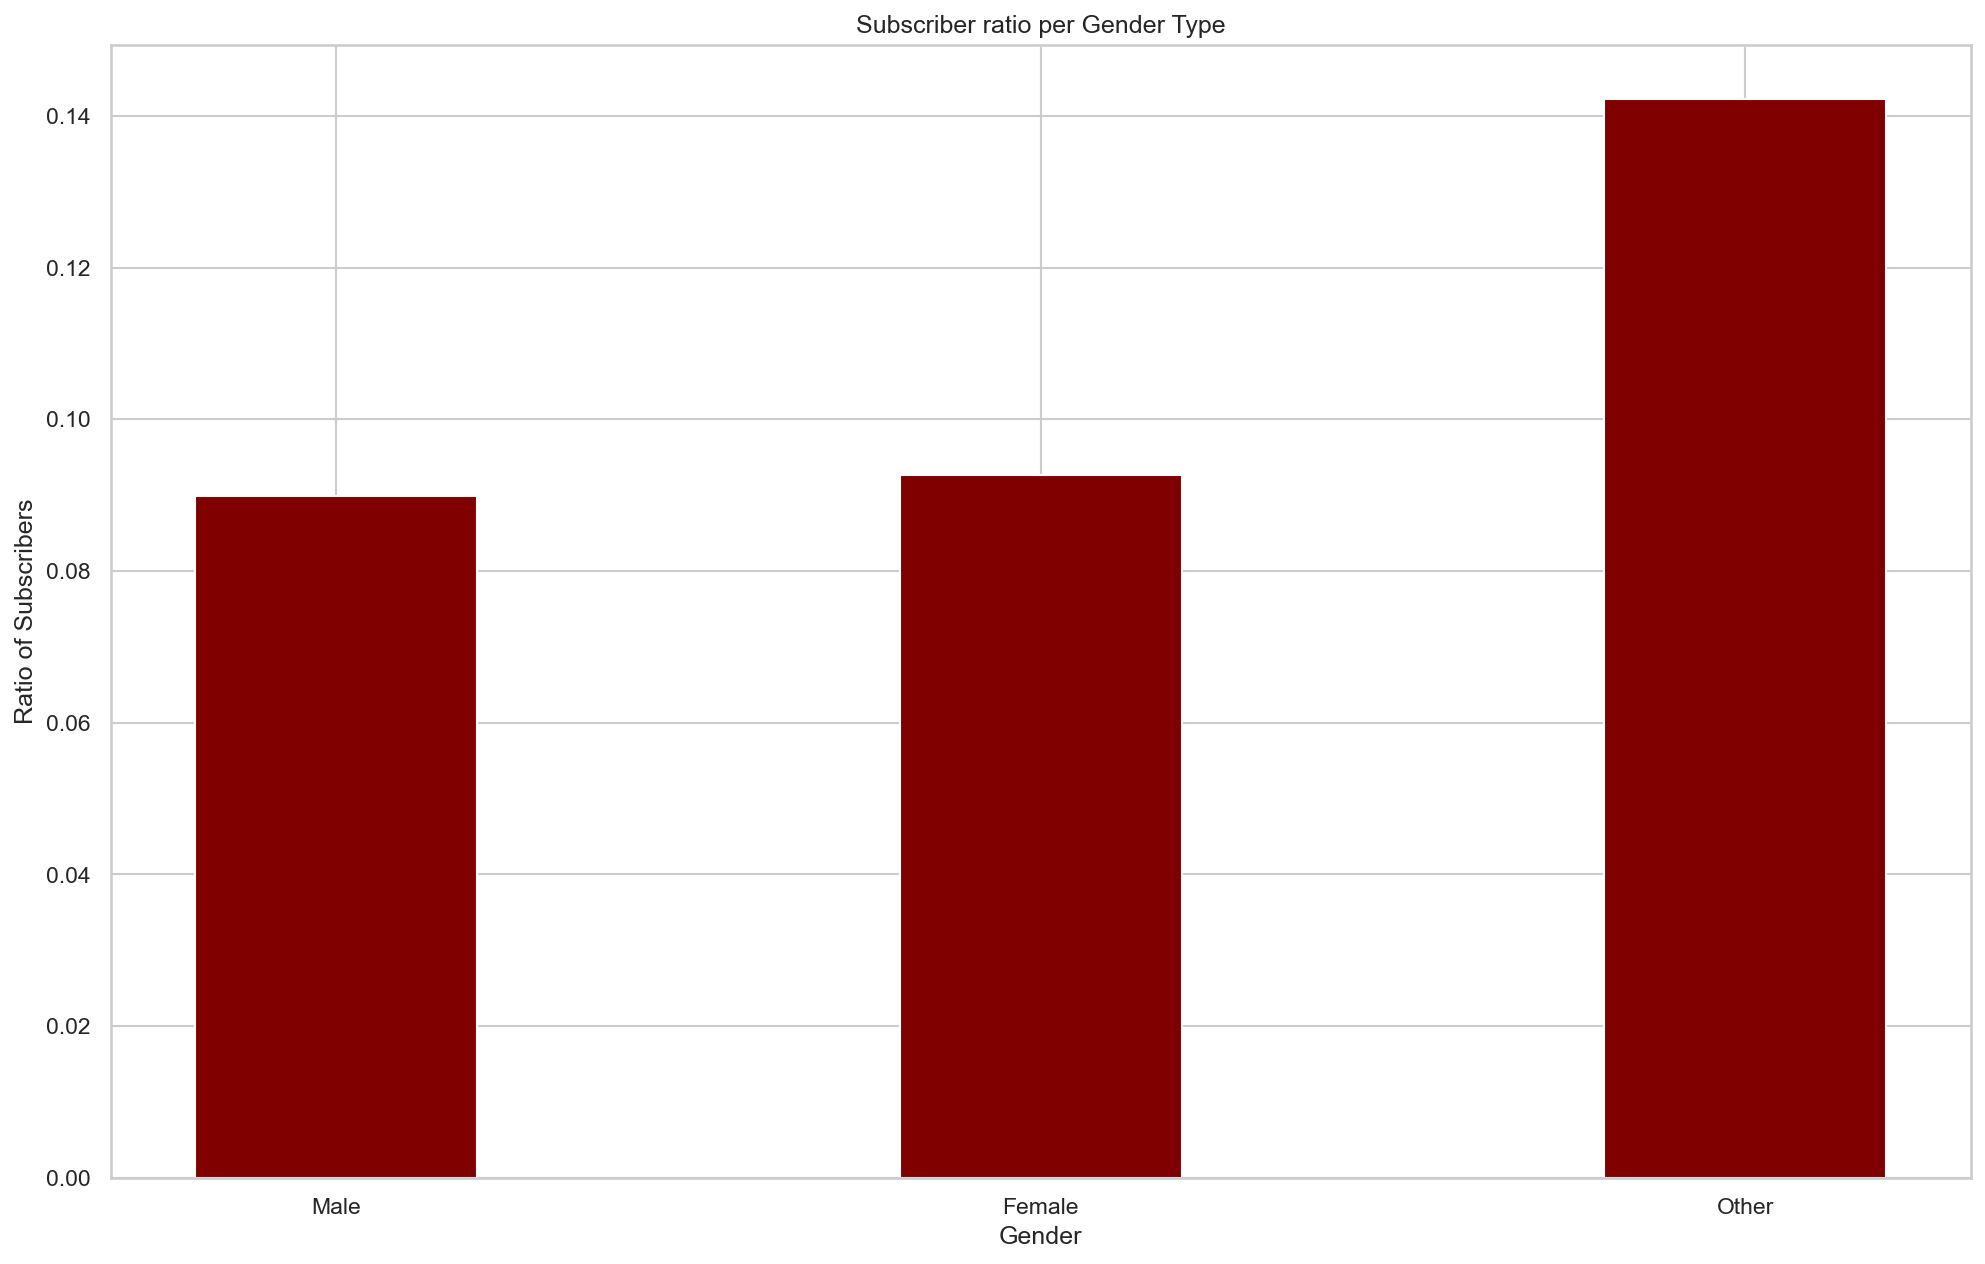

In [113]:
#Plot a Bar Graph Showing The subscriber ratio per Gender Type
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150 
plt.rcParams['savefig.dpi'] = 150

plt.bar(gender.keys(), ratio, color ='maroon',
        width = 0.4)
plt.xlabel("Gender")
plt.ylabel("Ratio of Subscribers")
plt.title("Subscriber ratio per Gender Type")
plt.show()

### Analysis:
#### This bar graph, subscriber ratio per Gender Type,  represents the probability of each specific gender type to subscribe to the service. This helps us classify each gender into a different category and see how many of the commuters from each specific gender are subscribing to the service. This can be highly influential due to the fact that it can help us identify where the market is stronger for subscriptions and hence provide them with more targeted marketing. For example, In our Data Analysis, we have observed that firstly, The percentage that any gender subscribes to the service is quite low, averaging approximately around 1%. This means that efforts can be made towards increasing this number by providing overall incentives for subscribing, encouraging more subscribers generally. Additionally, if we dig deeper, we can note that for the "Other" Gender type, there is almost double the chance that the person will be a subscriber relative to if the Gender Type was "Male" or "Female". Our data analysis also suggests that Male and Female percentage of subscribers is almost identical.

## Second Visualisation:

[Text(0.5, 1.0, 'Average Age per Profile Type')]

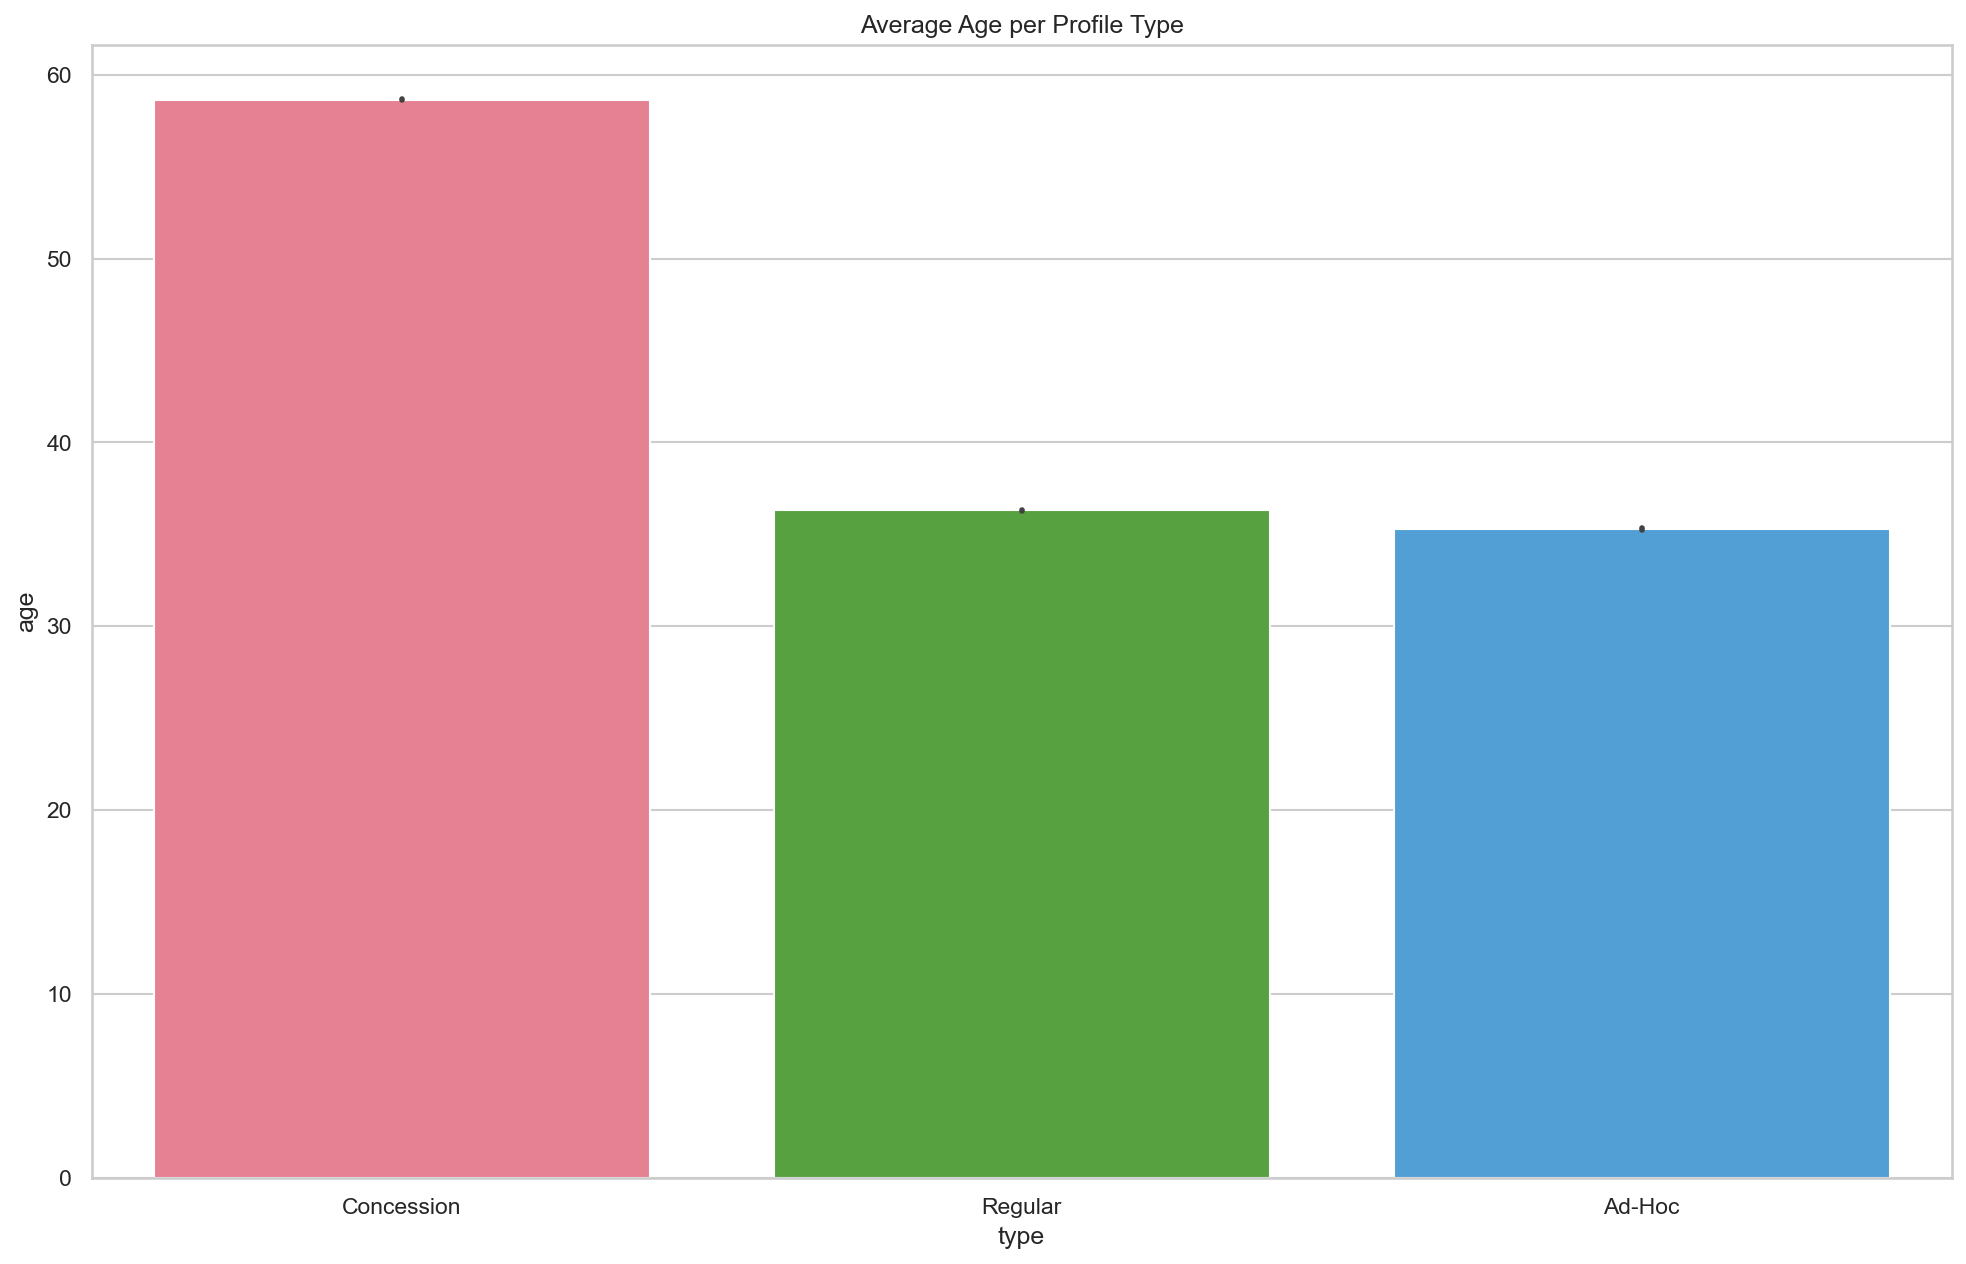

In [114]:
import seaborn as sns

sns.set(rc={"figure.dpi":150, 'savefig.dpi':150})
sns.set_theme(style="whitegrid")
sns.barplot(x='type', y='age', data=df, estimator=np.mean, palette="husl").set(title='Average Age per Profile Type')


### Analysis:
#### This bar graph, subscriber ratio per Gender Type,  represents the probability of each specific gender type to subscribe to the service. This helps us classify each gender into a different category and see how many of the commuters from each specific gender are subscribing to the service. This can be highly influential due to the fact that it can help us identify where the market is stronger for subscriptions and hence provide them with more targeted marketing. For example, In our Data Analysis, we have observed that firstly, The percentage that any gender subscribes to the service is quite low, averaging approximately around 1%. This means that efforts can be made towards increasing this number by providing overall incentives for subscribing, encouraging more subscribers generally. Additionally, if we dig deeper, we can note that for the "Other" Gender type, there is almost double the chance that the person will be a subscriber relative to if the Gender Type was "Male" or "Female". Our data analysis also suggests that Male and Female percentage of subscribers is almost identical.

## Third Visualisation:

In [115]:
print(df['origin'].mode())
print(df['destination'].mode())

0    30
Name: origin, dtype: int64
0    30
Name: destination, dtype: int64


Hence, we can see that number 30 location is the most common origin and destination place for the commute.

In [116]:
df_o = df.loc[df['origin'] == 30]         #Keep Only the population where origin place is 30
df_o.head()

,origin,destination,start,end,id,type,subscriber,age,gender
434,30,93,2022-01-01 14:17:28.043,2022-01-01 14:22:27.218,2634,Concession,No,62,Male
436,30,93,2022-01-01 14:17:31.270,2022-01-01 14:22:30.412,2451,Concession,No,58,Female
1048,30,16,2022-01-02 06:37:41.024,2022-01-02 06:46:18.172,3445,Regular,No,25,Male
1057,30,28,2022-01-02 06:43:16.620,2022-01-02 06:50:19.442,3329,Regular,No,53,Female
1058,30,27,2022-01-02 06:43:16.975,2022-01-02 06:51:28.695,2023,Regular,No,36,Female


[Text(0.5, 1.0, 'For Origin at 30, Average Age based on Gender & Type')]

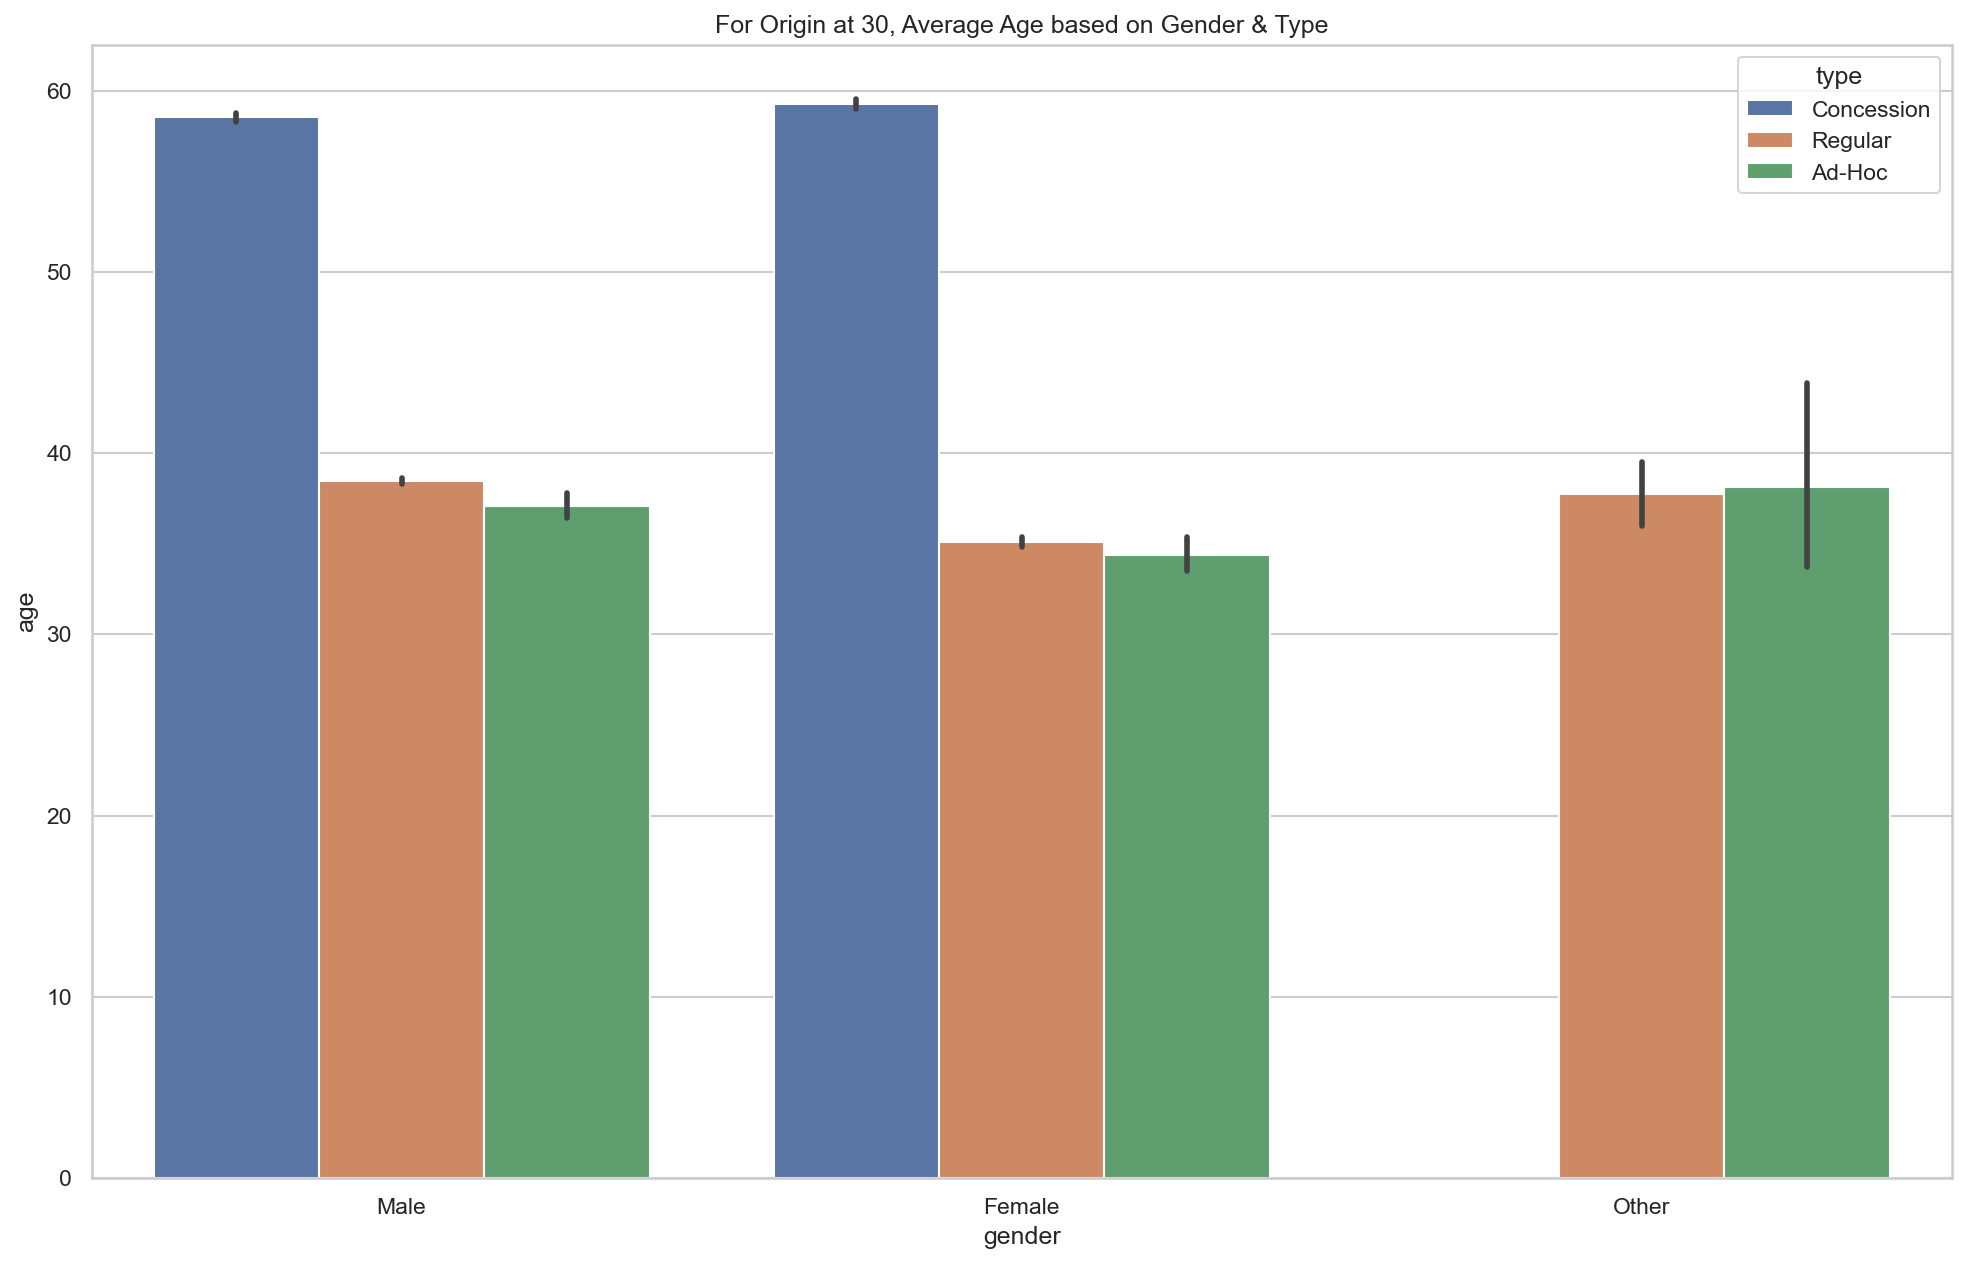

In [117]:
sns.barplot(x='gender', y='age', data=df_o, estimator=np.mean, hue="type").set(title='For Origin at 30, Average Age based on Gender & Type')

### Analysis:
#### This is a bar plot using sns. In seaborn, the barplot() function operated on the dataset and applied a function to estimate the mean of each row whilst also providing us multiple visualizations for each category. This one here shows Mean age vs gender while also showing us the type distinctiveness, when origin is fixed at the location id of ‘30’. This gives us a good estimate of the average age of people departing from location ‘30’ and their usual profiles. We can note that for male and females the profiles are almost exactly similar with average ages. However, the interesting part is that for the “Other” gender type there are no commuters with concession profile type, While the “Regular” or “Ad-Hoc” types’ average age is exactly the same for “Other gender” relative to the “Male” or “Female” Gender type. This can help us by understanding the age and profile types to cater the location or the terminal with the necessities required by the commuters while they wait for their transport. 